In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, "..")

In [4]:
from llmagent.secret import AK_SK
secret = AK_SK("../llmagent/secret/keystore/qwen.keys")

In [8]:
import os
os.environ["OPENAI_API_KEY"] = secret.ak

*** Error creating a JP2 color space: falling back to sRGB


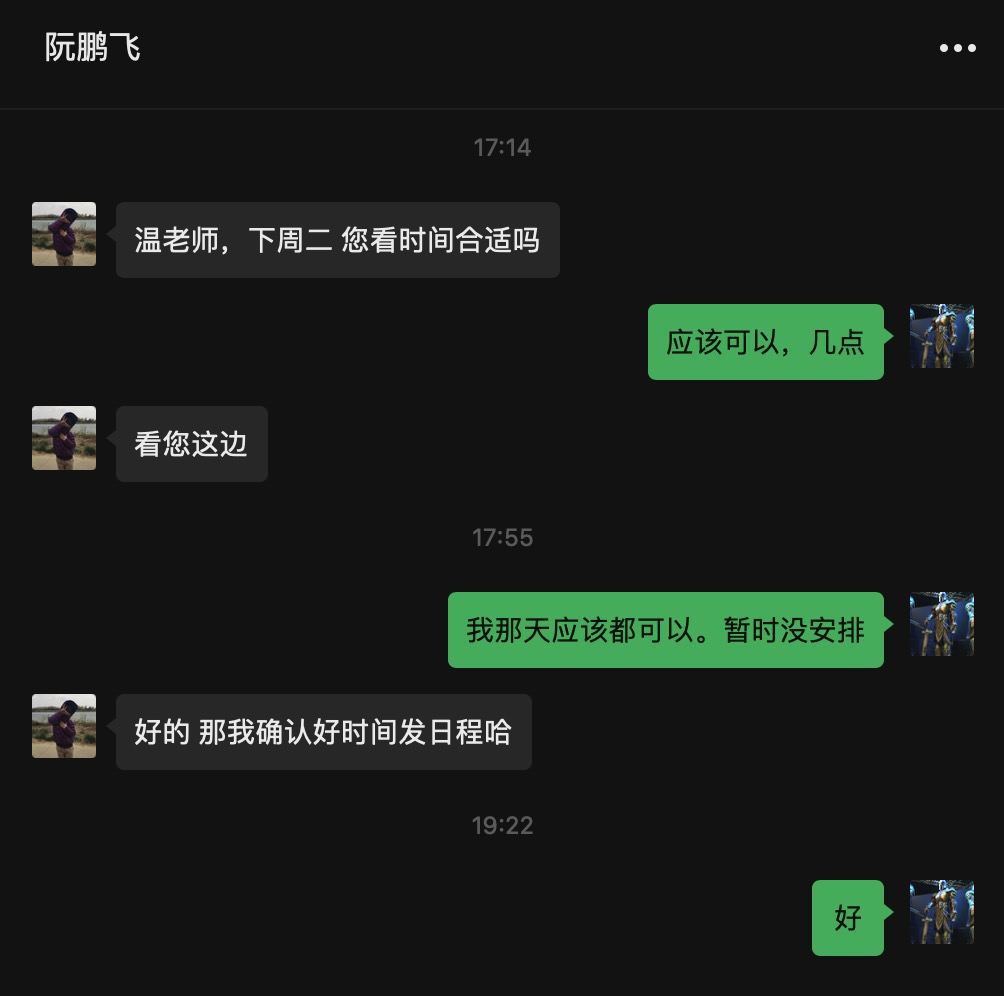


Base64编码:
iVBORw0KGgoAAAANSUhEUgAAA+wAAAPkCAIAAAC86COyAAABWGlDQ1BJQ0MgUHJvZmlsZQAAeJx1kDFLw1AUhU+0WikdRBSlKGRw...


In [8]:
import io
import base64
from PIL import Image, ImageGrab
from IPython.display import Image as IPImage
from IPython.display import display

def get_clipboard_image():
    """
    从剪贴板获取图片
    Returns:
        PIL.Image: 剪贴板中的图片，如果没有图片则返回None
    """
    try:
        # 从剪贴板获取图片
        img = ImageGrab.grabclipboard()
        if img is None:
            print("剪贴板中没有图片")
            return None
        return img
    except Exception as e:
        print(f"获取剪贴板图片时出错: {str(e)}")
        return None

def image_to_base64(image):
    """
    将PIL Image转换为base64字符串
    Args:
        image: PIL Image对象
    Returns:
        str: base64编码的字符串
    """
    if image is None:
        return None
    
    # 创建一个字节流对象
    buffer = io.BytesIO()
    # 将图片保存到字节流
    image.save(buffer, format="PNG")
    # 获取字节流内容并转换为base64
    img_str = base64.b64encode(buffer.getvalue()).decode()
    return img_str

def display_clipboard_image():
    """
    显示剪贴板中的图片并返回base64编码
    Returns:
        str: base64编码的字符串
    """
    # 获取剪贴板图片
    img = get_clipboard_image()
    if img is None:
        return None
    
    # 显示图片
    display(img)
    
    # 转换为base64并返回
    return image_to_base64(img)

# 使用示例
base64_string = display_clipboard_image()
if base64_string:
    print("\nBase64编码:")
    print(base64_string[:100] + "...") # 只显示前100个字符

In [12]:
from openai import OpenAI

from llmagent.llmapi import model_spec

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=secret.ak,
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)



{"id":"chatcmpl-eced51e3-7e8b-9892-a298-12cd13789104","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"我是个大模型，能够回答问题、创作文字，比如写故事、写公文、写邮件、写剧本等等，还能表达观点，玩游戏等。不过我无法进行绘画等物理操作，也暂时不具备联网功能。如果你有任何问题或需要帮助，尽管告诉我！","refusal":null,"role":"assistant","function_call":null,"tool_calls":null}}],"created":1729781706,"model":"qwen-plus","object":"chat.completion","service_tier":null,"system_fingerprint":null,"usage":{"completion_tokens":59,"prompt_tokens":10,"total_tokens":69,"completion_tokens_details":null,"prompt_tokens_details":null}}


In [26]:
completion = client.chat.completions.create(
    model=model_spec.QwenPlus.name,
    messages=[{"role": "user","content": "你能做什么"}],
    stream=True
)

In [27]:
for ck in completion:
    print(ck.choices[0].delta.content)


我
是个
大
模型
，能够回答问题
、创作文字，
比如写故事、
写公文、
写邮件、写
剧本等等，还能
表达观点，玩游戏
等。

